In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
import os
print(os.path.abspath(''))  

/Users/mengeshi/Documents/GitHub/DSK_model_MScThesis/plotting


In [3]:
seed = 1234

In [4]:
filename = f'../results/result_data/agent_data_{seed}.csv'
df_agent = pd.read_csv(filename, index_col='step')
df_agent.head()

""
step
0
1
2
3
4


NameError: name 'df' is not defined

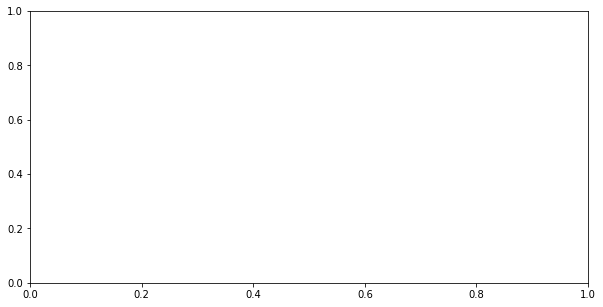

In [5]:
fig = plt.subplots(figsize=(10, 5))

for I_cat in ['labor_I', 'capital_I', 'UB_I', 'socben_I']:

    # Gather data
    I_mean = df[f'mean_{I_cat}_hh'].to_numpy()
    I_std = df[f'std_{I_cat}_hh'].to_numpy()

    # Plot mean and std
    plt.plot(I_mean, label=I_cat)
    plt.fill_between(df.index.to_numpy(), I_mean - I_std, I_mean + I_std, alpha=0.2)

plt.title('Household Income')
plt.legend()
plt.show()

# model data

In [6]:
filename = f'../results/result_data/model_data_{seed}.csv'
df_model = pd.read_csv(filename)
df_model.head()

,CPI_cp,CPI_kp,D_ep,EI_avg,Exp_UB,GDP,GDP_cp,GDP_growth,GDP_hh,GDP_kp,...,unspend_C,w_avg,w_req_avg,w_sat_avg,τˢ_ts,τᴱ_ts,τᴵ_ts,τᴷ_ts,τᴾ_ts,τᶜ_ts
0,100.000000,100.000000,55825.299711,0.0,0.0,157737.530368,-23582.518742,0.000000,196562.207053,-15242.157943,...,0.695806,1.391751,1.309829,1.284741,0.0,0.0,0.25,0.25,0.25,0.1
1,154.920892,128.124623,166320.878049,0.0,0.0,284276.741719,-15770.518154,0.000000,227841.226508,72206.033364,...,0.798856,1.567663,1.293866,1.275528,0.0,0.0,0.25,0.25,0.25,0.1
2,331.443622,130.027212,245154.526703,0.0,0.0,716099.391234,319699.878400,0.000000,310944.538926,85454.973909,...,0.386649,1.494885,1.292822,1.268255,0.0,0.0,0.25,0.25,0.25,0.1
3,319.138802,135.115121,277489.396522,0.0,0.0,988590.183348,481023.448103,96.381986,442034.260110,65532.475135,...,0.095411,1.419435,1.291214,1.262922,0.0,0.0,0.25,0.25,0.25,0.1
4,216.874544,137.051520,268821.547283,0.0,0.0,843722.468580,329106.729441,112.011635,511251.075196,3364.663943,...,0.042831,1.255228,1.289996,1.260467,0.0,0.0,0.25,0.25,0.25,0.1


In [7]:
import statsmodels.api as sm
import statsmodels.tsa.stattools as smt

In [8]:
# Set parameters for bandpass filters
bk_low = 18
bk_high = 96
bk_K = 36

In [9]:
def plot_ccf(x, y):
    x_filtered = sm.tsa.filters.bkfilter(x[300:], bk_low, bk_high, bk_K)
    y_filtered = sm.tsa.filters.bkfilter(y[300:], bk_low, bk_high, bk_K)

    ccf_back = smt.ccf(x_filtered[::-1], y_filtered[::-1])[1:10][::-1]
    ccf_forw = smt.ccf(x_filtered, y_filtered)[:10]

    fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(6, 3))

    ax1.plot(np.concatenate((ccf_back, ccf_forw)))
    ax1.set_xticks(np.arange(19, step=3), np.arange(-9, 10, step=3))
    ax1.axhline(0, color='black', linestyle='dashed')

    ax2.plot(x_filtered)
    ax2.plot(y_filtered)
    
    plt.tight_layout()
    plt.show()

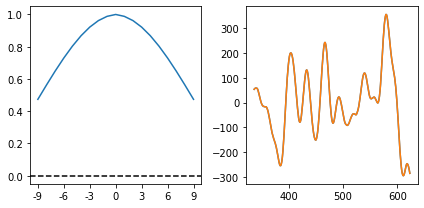

In [10]:
x = df_model.GDP / df_model.CPI_cp
y = df_model.GDP / df_model.CPI_cp
plot_ccf(x, x)

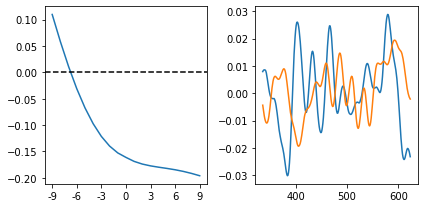

In [11]:
x = df_model.GDP / df_model.CPI_cp
y = df_model.w_avg
plot_ccf(np.log(x), y)

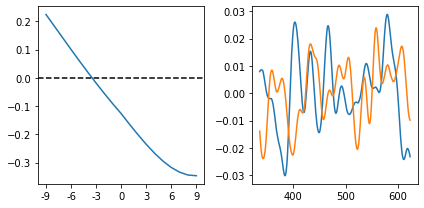

In [12]:
x = df_model.GDP / df_model.CPI_cp
y = 100 * df_model.w_avg / df_model.CPI_cp
plot_ccf(np.log(x), y)